# Collaborative Filtering Recommender 

following this : https://beckernick.github.io/matrix-factorization-recommender/

In [1]:
# import Libraries
import pandas as pd
import numpy as np

Loading Rating Dataset

In [2]:
cols= ["user_id", "item_id", "rating", "timestamp"]

In [3]:
ratings_df = pd.read_csv('u.data.txt',sep='\t',names=cols)

In [4]:
ratings_df.sample(8)

,user_id,item_id,rating,timestamp
26164,125,790,4,892838462
73333,924,121,4,886760071
15443,379,651,4,880568511
32434,91,210,5,891439208
54233,659,664,4,891386380
41352,276,759,1,874796412
94818,650,443,5,891369982
55073,727,1273,3,883713286


Creating User-Item Rating Matrix

In [5]:
Rating_Matrix_orig = ratings_df.pivot(index = 'user_id', columns ='item_id', values = 'rating')
Rating_Matrix_orig.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
381,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,5.0,NaN,NaN,4.0,3.0,NaN,4.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,5.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# filling nan values with zeros 
Rating_Matrix = Rating_Matrix_orig.fillna(0)
Rating_Matrix.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
906,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,4.0,0.0,0.0,4.0,0.0,0.0,4.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,5.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,4.0,0.0,4.0,4.0,0.0,0.0,5.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,5.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# DataFrame to numpy array or matrix
RM_orig= Rating_Matrix_orig.values
RM = Rating_Matrix.values

In [8]:
# finding Mean to remove skewness

# Calculating mean Using only original values, skipping null values
# user_ratings_mean = np.nanmean(RM_orig, axis = 1)

# Using 0 instead of nan to calculate mean
user_ratings_mean = np.mean(RM, axis = 1)

RM_demeaned = RM - user_ratings_mean.reshape(-1, 1)

Decomposing values using SVD

In [9]:
from scipy.sparse.linalg import svds

In [10]:
# 50 latent factors
U, sigma, Vt = svds(RM_demeaned, k = 50)

# SVDS on skewed data
U_sk, sigma_sk, Vt_sk = svds(RM, k = 50)
sigma_sk = np.diag(sigma_sk)

In [11]:
sigma = np.diag(sigma)
sigma.shape

(50, 50)

Predicting rating based on latent feature matrices and their weights 

In [12]:
# for normalized data
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
# numpy array to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = Rating_Matrix.columns)


# Skewed data
all_user_predicted_ratings_sk = np.dot(np.dot(U_sk, sigma_sk), Vt_sk)
# numpy array to dataframe
preds_sk_df = pd.DataFrame(all_user_predicted_ratings_sk, columns = Rating_Matrix.columns)

Calculating Error

In [13]:
# Function to find error only for items that we originally rated
def cal_matrix_rmse(pred,orig):
    total_error_sum=0
    total_error_num=0
    rmse = 0
    for i in range(len(pred)):
        for j in range(len(pred[i])):
            if orig[i][j]>0:
                total_error_num+=1
                total_error_sum+=(pred[i][j]-orig[i][j])**2
    if total_error_num>0:
        rmse = np.sqrt(total_error_sum/total_error_num)
    return rmse

In [14]:
# For normalized data
cal_matrix_rmse(all_user_predicted_ratings,RM)

1.8532981949601184

In [15]:
# For skewed data
cal_matrix_rmse(all_user_predicted_ratings_sk,RM)

1.8556603989598532

## Extra Work 

In [16]:
def find_k(Orig_matrix,k_max=150,k_min=10):
    k_stat=[]
    user_ratings_mean = np.nanmean(Orig_matrix, axis = 1)
    RM_demeaned = Orig_matrix - user_ratings_mean.reshape(-1, 1)
    for k in range(k_min,k_max+1):
        U_k, sigma_k, Vt_k = svds(RM_demeaned, k=k)
        sigma_k = np.diag(sigma_k)
        m1= np.dot(U_k, sigma_k)
        all_user_predicted_ratings = np.dot(m1, Vt_k) + user_ratings_mean.reshape(-1, 1)
        
        rmse=cal_matrix_rmse(all_user_predicted_ratings,Orig_matrix)
        print(k,rmse)
        k_stat.append([k,rmse])
        del U_k, sigma_k, Vt_k
    return k_stat

In [17]:
stats= find_k(RM)

10 2.272765119644259
11 2.254692833423006
12 2.2372063679620937
13 2.2207745575618922
14 2.206124253865147
15 2.192062768463186
16 2.178531238948387
17 2.165516301226192
18 2.1530960170503897
19 2.140524398024512
20 2.128501668548123
21 2.117233649941741
22 2.1064959193718145
23 2.095629886414788
24 2.085367945500775
25 2.0751023729758553
26 2.0649591923159667
27 2.0551707702409674
28 2.0455992491106545
29 2.036203478215986
30 2.026325537720349
31 2.0165470636468346
32 2.007012358054803
33 1.9979093205196676
34 1.988563775736309
35 1.9797615117857896
36 1.970564727659752
37 1.9613665760460357
38 1.9525677728264508
39 1.9438488365042579
40 1.9352621363801317
41 1.926822413393467
42 1.9181001725548847
43 1.9098648121057802
44 1.9016813077006185
45 1.8932324942409144
46 1.8854471826459291
47 1.8774238099869047
48 1.8694758199823776
49 1.8611711426585362
50 1.8532981949601188
51 1.8453426304958847
52 1.8374966829610906
53 1.8296830580461758
54 1.8221507892063507
55 1.8144806364664232
56 1.

In [18]:
Stat_2 = find_k(RM,300,150)

150 1.2383413977336664
151 1.2333637088933456
152 1.2284493800399627
153 1.2236321709457003
154 1.218798058048742
155 1.2139842241001915
156 1.2091276276521357
157 1.2043210806283398
158 1.1994252304806714
159 1.1946868904516301
160 1.1901164429553537
161 1.185663501403728
162 1.1810974394222635
163 1.1763389921422305
164 1.1717329845320454
165 1.167070693206736
166 1.1623680331688904
167 1.157841655106279
168 1.153142403761252
169 1.148521109660602
170 1.1438055092113117
171 1.1391598985308515
172 1.1346423719670713
173 1.1303131049989554
174 1.1259577902128668
175 1.1214086895250053
176 1.1171102585564419
177 1.1126971571975661
178 1.1083757745503686
179 1.1038478286360405
180 1.0995563098124077
181 1.09516146436297
182 1.0906437800944044
183 1.0862605657874855
184 1.0821339851553013
185 1.0777986206801993
186 1.0735166214220355
187 1.0692832302337425
188 1.0648517661593744
189 1.0605717261197731
190 1.056105234424204
191 1.0518349869605217
192 1.0476405057932516
193 1.04323102962938

In [19]:
all_stat=np.concatenate((stats,Stat_2), axis=0)


In [20]:
all_stat.reshape(-1,2)
all_stat

array([[ 10.        ,   2.27276512],
       [ 11.        ,   2.25469283],
       [ 12.        ,   2.23720637],
       [ 13.        ,   2.22077456],
       [ 14.        ,   2.20612425],
       [ 15.        ,   2.19206277],
       [ 16.        ,   2.17853124],
       [ 17.        ,   2.1655163 ],
       [ 18.        ,   2.15309602],
       [ 19.        ,   2.1405244 ],
       [ 20.        ,   2.12850167],
       [ 21.        ,   2.11723365],
       [ 22.        ,   2.10649592],
       [ 23.        ,   2.09562989],
       [ 24.        ,   2.08536795],
       [ 25.        ,   2.07510237],
       [ 26.        ,   2.06495919],
       [ 27.        ,   2.05517077],
       [ 28.        ,   2.04559925],
       [ 29.        ,   2.03620348],
       [ 30.        ,   2.02632554],
       [ 31.        ,   2.01654706],
       [ 32.        ,   2.00701236],
       [ 33.        ,   1.99790932],
       [ 34.        ,   1.98856378],
       [ 35.        ,   1.97976151],
       [ 36.        ,   1.97056473],
 

In [21]:
from matplotlib import pyplot as plt

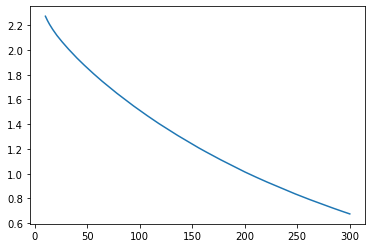

In [22]:
plt.plot(all_stat[:,0],all_stat[:,1])
plt.show()

In [23]:
preds_df.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
533,3.931404,0.179753,1.786289,-0.005322,0.151937,0.003179,4.018175,-0.567701,1.551382,0.435893,...,0.004192,-0.029761,0.019859,0.009497,-0.013432,-0.009993,-0.007528,-0.008761,-0.020206,-0.027090
276,2.985089,-0.110645,0.541715,0.435877,0.096874,0.184970,3.427511,-0.125639,3.094505,0.278777,...,-0.005462,-0.021055,-0.024562,-0.018704,0.003312,-0.011704,-0.021135,-0.016419,0.008419,-0.026743
537,1.038410,-0.196742,0.163696,2.342037,0.102545,0.019420,2.379610,2.018511,0.833764,-0.014287,...,0.051721,0.051922,0.033682,0.027805,0.044233,0.014873,0.012517,0.013695,0.045389,0.013193
861,0.980468,0.269777,1.321029,1.489814,-1.169862,0.283672,5.212949,-1.694962,-0.570496,0.899330,...,0.007435,0.108005,0.010231,0.009656,0.057944,0.000256,-0.016248,-0.007996,0.032455,0.067204
478,3.520377,0.846142,0.329471,0.966303,-0.028346,0.011922,2.333488,3.555182,-0.792670,0.880471,...,-0.034607,0.016894,0.016775,-0.002462,-0.038543,-0.038661,-0.034110,-0.036385,0.029338,-0.087842
499,4.294677,-0.579178,2.620524,1.248963,0.562636,1.007551,5.023981,1.090285,1.960913,2.122394,...,0.008144,0.030967,-0.086581,-0.061567,-0.005681,-0.013520,-0.017479,-0.015500,-0.078641,0.118916
832,1.395039,1.355378,0.187764,2.930645,1.471460,0.167900,3.554253,1.378396,1.631730,1.113013,...,-0.000226,-0.053358,0.022778,0.009169,-0.003628,-0.018441,-0.019223,-0.018832,-0.066786,-0.046606
702,4.697184,-0.152244,0.261762,-0.170556,0.347714,-0.072212,2.586588,-0.150070,2.092102,-0.117313,...,-0.002146,-0.024127,-0.050040,-0.036141,-0.012243,-0.011536,-0.017922,-0.014729,0.011383,-0.045045


In [24]:
preds_sk_df.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
828,3.565863,0.079268,0.392958,-0.202533,-0.050042,0.285920,2.207042,1.337656,2.234836,1.285076,...,-0.022693,0.019488,-0.027441,-0.018294,-0.023315,0.001950,0.005849,0.003899,0.018390,0.024280
262,4.108664,0.476145,0.318307,0.258756,-0.233353,-0.062873,2.011692,0.266409,1.604905,0.657064,...,0.012042,0.041791,-0.021989,-0.014659,-0.004642,0.003338,0.010014,0.006676,-0.066800,-0.001815
479,1.148427,0.368010,-0.829211,0.587930,0.853661,0.055192,1.266943,2.090433,0.182323,0.069152,...,0.002262,0.063103,0.016382,0.010921,0.018942,-0.001251,-0.003752,-0.002502,0.000855,-0.029728
590,0.199730,-0.263091,-0.205118,2.135093,0.171202,0.072813,-0.151738,1.801089,1.826128,-0.047151,...,-0.039475,0.036398,0.000529,0.000353,-0.004424,-0.003134,-0.009401,-0.006267,-0.026762,-0.009346
179,0.074800,0.360536,0.401516,0.775856,0.150204,-0.046605,0.756183,0.745978,0.596625,-0.149985,...,0.019589,-0.004455,-0.034492,-0.022994,0.045595,0.000482,0.001447,0.000965,0.034152,0.049096
100,3.482775,-0.236485,0.415573,-0.307774,0.045037,-0.171077,1.909493,0.126046,0.123808,-0.017854,...,0.003037,0.032504,0.028744,0.019163,0.005617,-0.000597,-0.001791,-0.001194,0.013268,0.014505
560,1.531615,1.007396,1.465608,2.953963,0.815741,0.108111,5.191054,1.837601,3.329059,1.927714,...,-0.066648,0.071788,0.014021,0.009347,0.005250,-0.001174,-0.003522,-0.002348,0.032661,0.118098
696,4.948352,-0.515209,0.925901,-0.285638,0.136992,0.490018,3.209434,-0.243942,2.736537,1.547268,...,-0.001209,-0.052829,0.079065,0.052710,-0.026055,0.010711,0.032133,0.021422,0.038011,0.005619


### Finding Optimum number of Latent features

In [25]:
def find_best_k(Orig_matrix,krange=[50]):
    k_stat=[]
    user_ratings_mean = np.nanmean(Orig_matrix, axis = 1)
    RM_demeaned = Orig_matrix - user_ratings_mean.reshape(-1, 1)
    for k in krange:
        U_k, sigma_k, Vt_k = svds(RM_demeaned, k=k)
        sigma_k = np.diag(sigma_k)
        m1= np.dot(U_k, sigma_k)
        all_user_predicted_ratings = np.dot(m1, Vt_k) + user_ratings_mean.reshape(-1, 1)
        
        rmse=cal_matrix_rmse(all_user_predicted_ratings,Orig_matrix)
        print(k,rmse)
        k_stat.append([k,rmse])
        del U_k, sigma_k, Vt_k
    return k_stat

In [26]:
K_range=[20,30,40,50]
best_k_stat=np.array(find_best_k(RM,K_range))

20 2.128501668548123
30 2.0263255377203495
40 1.9352621363801301
50 1.8532981949601184


Plotting a graph of error vs number of features

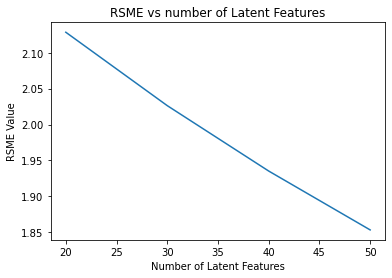

In [27]:
from matplotlib import pyplot as plt

plt.plot(best_k_stat[:,0],best_k_stat[:,1])
plt.xlabel("Number of Latent Features")
plt.ylabel("RSME Value")
plt.title("RSME vs number of Latent Features")
plt.show()

## Recomending movies from Predicted rating

In [28]:
# loading dataset
movies_data_df = pd.read_csv('u.item.txt',sep='\|',names=['item_id', 'movie title', 'release_date', 'video_release_date',
         'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
         "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western'],engine='python')



In [29]:
# Keeping only movieID and title
movies_df= movies_data_df[['item_id','movie title']]
movies_df.sample(8)

,item_id,movie title
913,914,Wild Things (1998)
648,649,Once Upon a Time in America (1984)
1145,1146,Calendar Girl (1993)
134,135,2001: A Space Odyssey (1968)
536,537,My Own Private Idaho (1991)
890,891,Bent (1997)
832,833,Bulletproof (1996)
1260,1261,"Run of the Country, The (1995)"


<ipython-input-31-01a891551d8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['movie title'] = movies_df['movie title'].fillna("").astype('str')


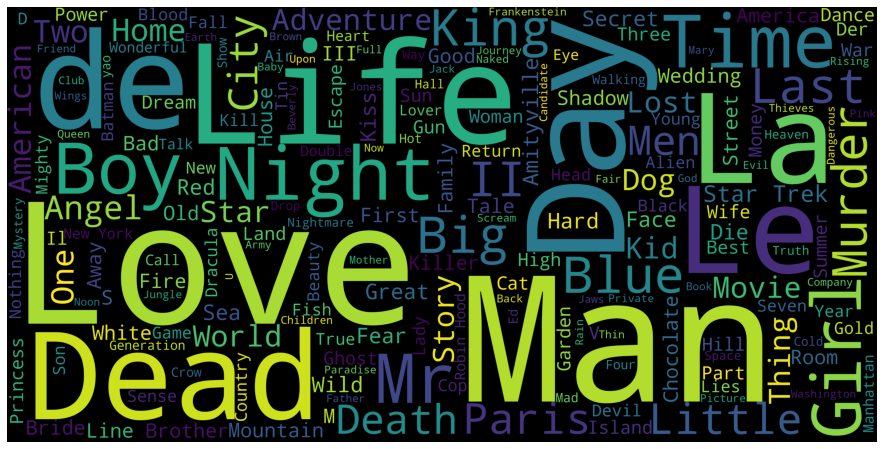

In [31]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies_df['movie title'] = movies_df['movie title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [32]:
# Function to generate list of movies
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'item_id', right_on = 'item_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['item_id'].isin(user_full['item_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'item_id',
               right_on = 'item_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations


Enter UserID and Number of recommendations needed

In [33]:
uid=837
number_of_recommendation= 10 

In [34]:
already_rated, predictions = recommend_movies(preds_df, uid, movies_df, ratings_df, number_of_recommendation)

User 837 has already rated 46 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [35]:
# list of movies rated by User
already_rated.head(10)

,user_id,item_id,rating,timestamp,movie title
44,837,740,5,875722123,Jane Eyre (1996)
37,837,1009,5,875721765,Stealing Beauty (1996)
9,837,283,5,875722069,Emma (1996)
36,837,125,5,875722032,Phenomenon (1996)
11,837,289,5,875721539,Evita (1996)
24,837,151,5,875721734,Willy Wonka and the Chocolate Factory (1971)
23,837,258,4,875721473,Contact (1997)
14,837,20,4,875721919,Angels and Insects (1995)
22,837,294,4,875721502,Liar Liar (1997)
27,837,328,4,875721604,Conspiracy Theory (1997)


In [36]:
# list of recommended movies
predictions

,item_id,movie title
11,14,"Postino, Il (1994)"
0,1,Toy Story (1995)
107,116,Cold Comfort Farm (1995)
116,126,"Spitfire Grill, The (1996)"
42,50,Star Wars (1977)
238,255,My Best Friend's Wedding (1997)
440,471,Courage Under Fire (1996)
92,100,Fargo (1996)
258,282,"Time to Kill, A (1996)"
704,742,Ransom (1996)
